# Simulation

This is all the code for the simulation of the market, including the traders, the asset and the market mechanism.

In [1]:
# Import relevant packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import pymarket as pm
import networkx as nx
import math

,period,trading price,true price,10 MA,50 MA,RSI,SO
0,-100,96.988088,100,NaN,NaN,NaN,NaN
1,-99,97.272129,100,NaN,NaN,NaN,NaN
2,-98,95.299544,100,NaN,NaN,NaN,NaN
3,-97,95.176754,100,NaN,NaN,NaN,NaN
4,-96,94.008399,100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
95,-5,99.308995,100,99.84,99.09,58.389280,41.004078
96,-4,98.818393,100,99.68,99.15,60.932198,29.768252
97,-3,100.640194,100,99.65,99.26,55.067171,71.491378
98,-2,100.012704,100,99.52,99.31,57.718652,57.120532


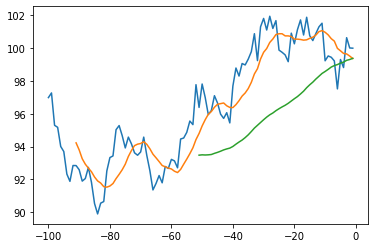

In [2]:
# Initialise the trading asset, as well as t previous random prices so that the technical analyst traders have some
# material to use to make their inital trading decisions. These random prices will be kept constant throughout the
# simulations so they don't affect the decisions of the traders between rounds. The price at t=0 will be 100 so price
# movements during the simulation are normalised to an index.

t = 100
period = []
start = -t

for i in range(t):
    period.append(start)
    start += 1
    
# asset_prices_rev = []
# price = 100

# for i in range(t):
    # asset_prices_rev.append(price)
    # price = price + np.random.normal(loc=-0.09, scale=1.0, size=None)
    
asset_prices_rev_final = [100, 100.01270443267846, 100.64019372161697, 98.81839318571531, 99.30899479777956, 97.51859080046586, 99.22427385535754, 99.44545557876086, 99.52622326159883, 99.23209122576705, 101.52132601414174, 101.30141646048006, 100.89710059388699, 100.46473999622577, 100.75961538456453, 101.88499554537094, 100.80411278857896, 101.72248034025961, 101.12565566539686, 100.26632483034365, 100.91562712976665, 99.17772539309188, 99.59066814732586, 99.75049301170291, 99.88257405096272, 101.67780729403768, 101.20291667999382, 101.94670634215417, 101.10767031065018, 101.81291988910793, 101.30365747376271, 99.2424041923615, 100.8833495441585, 99.78836505154021, 99.33535482264746, 98.97871646915819, 99.06522794959744, 98.30142009719744, 98.79170348115102, 97.6910991393464, 95.44595047877094, 96.06814982285735, 95.72056059028928, 95.98006873492281, 96.66174879041085, 97.10418900617363, 96.20190098646628, 95.95299800697686, 96.99590538116517, 97.81622741995606, 96.3887487724033, 97.77586186321399, 95.34063768966071, 95.55822196174113, 94.86914074199406, 94.52574130209447, 94.46441233699015, 92.7093912019743, 93.12968534010358, 93.2223145464527, 92.66989504822202, 92.78906639898042, 91.794571679981, 92.23728712947086, 91.7531808557108, 91.36069829889261, 92.5351177867759, 93.46525633285206, 94.57936577428167, 93.6743842774735, 93.47493406493045, 93.6252878884862, 94.17103159031704, 94.57988577655658, 93.92021148266691, 94.66830817347167, 95.2828076714649, 95.03199804355003, 93.43284668672827, 93.33299029582979, 92.51972813503856, 90.65244342293956, 90.55553325883402, 89.89860870807794, 90.5321278206722, 91.82820852517096, 92.73328391342815, 92.05545521924738, 91.89793090418809, 92.59268573869126, 92.84506087167615, 92.8490494107132, 91.88331933594272, 92.3255816844502, 93.70032141468926, 94.00839921394368, 95.17675414492784, 95.29954443407748, 97.27212940879878, 96.98808834932551]

asset_prices_rev_final.reverse()
asset_prices = asset_prices_rev_final
        
true_prices = []
    
for i in range(t):
    true_prices.append(100) #Assume true price unchanged in this period - remained 100
    
def evolve(price_list): # Define the function that determines the evolution of the true asset price throughout
    last_price = price_list[-1]
    base_price = last_price*(1 + (1.05**(1/100))) #The true price evolves to give a 5% return every 100 periods
    shock_p = np.random.randint(100, size=1)
    if shock_p < 5:
        shock = np.random.normal(loc=0, scale=5, size=None)
    elif shock_p > 5 and shock_p < 40:
        shock = np.random.normal(loc=0, scale=1, size=None)
    next_price = base_price + shock
    return next_price
    
def moving_average(price_list, window): #Define a function to calculate simple moving averages
    window_size = window
    price_series = pd.Series(price_list)
    windows = price_series.rolling(window_size)
    ma = round(windows.mean(), 2)
    ma_list = ma.tolist()
    return ma_list
    
mas = moving_average(asset_prices, 10) #Generate shorter moving average
mal = moving_average(asset_prices, 50) #Generate longer moving average

def RSI(price_list, period): # Define a function to calculate RSI values
    rsi_list = []
    for i in range(period):
        rsi_list.append(float("NaN"))
    for ind in enumerate(price_list[period:]):
        return_list = []
        length = period
        for i in range(length):
            ret = (price_list[ind[0]-period+length]-price_list[ind[0]-period+length-1])/price_list[ind[0]-period+length-1]
            return_list.append(ret)
            length -= 1
        ret_pos = []
        ret_neg = []
        for ret in return_list:
            if ret > 0:
                ret_pos.append(ret)
            else: 
                ret = ret*-1
                ret_neg.append(ret)
        try:
            ret_pos_mean = sum(ret_pos)/len(ret_pos)
            ret_neg_mean = sum(ret_neg)/len(ret_neg)
            rsi_val = 100 - (100/(1+(ret_pos_mean/ret_neg_mean)))
        except: rsi = float("NaN")
        rsi_list.append(rsi_val)     
    return rsi_list
        
rsi = RSI(asset_prices, 14) # Generate 14 period RSI, very standard indicator used by many technical traders.

def stochastic(price_list, period):
    sto_list = []  
    for i,j in enumerate(price_list):
        if i < period:
            sto_list.append(float("NaN"))
        else:
            c = j
            list_period = price_list[i-period:i+1]
            l = min(list_period)
            h = max(list_period)
            sto = 100*((c-l)/(h-l))
            sto_list.append(sto)
    return sto_list
        
stoch = stochastic(asset_prices, 14)

assetdf = pd.DataFrame({"period": period, "trading price": asset_prices, "true price": true_prices, "10 MA": mas, "50 MA": mal, "RSI": rsi, "SO": stoch})

plt.plot(period, asset_prices)
plt.plot(period, mas)
plt.plot(period, mal)
#plt.plot(period, rsi)
#plt.plot(period, stoch)
assetdf

In the next cell we define the different flavours of traders and the syntax of how they receive information and place orders accordingly. Flavours include simple and complex chartists, fundamentalists/arbitraguers, value traders and noise traders. The LSTM traders will be included later on once a working market has been established.

Simple chartists use a simple moving average crossover strategy as a proxy for trend-following. The strength of the trend determines the bid/ask they are willing to place as well as the size of the order, to show the confidence the trader has in the trend. Complex chartists use a slightly more sophisticated strategy to assess trends, they have two conditions that trigger a buy/sell signal. One is derived from an RSI (relative strengh index) indicator and the other is from a stochastic oscillator indicator. These are both indicators that assess momentum and are used to determine the strength of price trends. Whether or not these indicators are empirically more accurate/useful than SMAs is debatable, but they are widely accepted to be in the retail trading community.

Fundamentalists exist to constantly provide pressure towards the "true" price of the asset. They will act as arbitrageurs to push the price towards the true price of the asset. The further away price deviates from the "true" price, the higher the order size grows as they believe the asset is truly under/overvalued. For the purposes of simplicity, a true price will be given exogenously, and will evolve linearly with some random shocks. Value traders are those that believe "time in the market beats timing the market" and will buy and hold the asset at the start. They expect to make their returns over the long term based on the true price of the asset growing.

Noise traders have no specific strategy and simply buy and sell at random to provide volume in the market.

In [3]:
class trader: # schart = simple technical analyst
              # cchart = complex technical analyst
              # arb = fundamentalist/arbitrageur
              # val = buy and hold "value traders"
              # noise = noise traders

    schart_count = 1 # Remember number of traders is count-1 as currently we have count+=1 everytime a new trader is made.
    cchart_count = 1
    arb_count = 1
    val_count = 1
    noise_count = 1

    def w(p): # Define the probability weighting function (prospect theory) for the utility of the traders
        g = 0.5 # G for gamma (0.5 taken from empirical studies)
        return (p**g)/((p**g+(1-p)**g)**(1/g))

    def v(x): #Define the value function (prospect theory) for the utility of the traders
        a = 0.44 # a for alpha (all parameter values have been taken from empirical studies)
        b = 0.49 # b for beta
        l = 1.06 # l for lambda
        if x >= 0:
            v = x**a
        elif x < 0:
            v = -l(-x)**b
        return v
    
    def prob(r,s):
        p = 1/(1+math.exp(-(-(math.log(99))+(math.log(99)/35)*r+(math.log(99)/20)*s)))
        return p
        
    def __init__(self, flavour, firm):
        self.firm = firm 
        self.flavour = flavour     
        self.bal = 1_000_000 if firm else 10_000 # Firms will be given a higher starting endowment to trade with to represent higher market power.
        self.stock = 0
        self.acc = self.stock + self.bal # Account size equals value of stock + value of cash balance

        if self.flavour == "schart": #Assign IDs for each trader to keep track of balance over time
            self.id = self.flavour + str(trader.schart_count)
            trader.schart_count += 1
        elif self.flavour == "cchart":
            self.id = self.flavour + str(trader.cchart_count)
            trader.cchart_count += 1
        elif self.flavour == "arb": #Arbitrgeurs have an imperfect view of the true price
            self.id = self.flavour + str(trader.arb_count)
            trader.arb_count += 1
            if firm:
                self.tp_error = np.random.normal(loc=0, scale=0.75, size=None)
            else:
                self.tp_error = np.random.normal(loc=0, scale=1.5, size=None)
        elif self.flavour == "val":
            self.id = self.flavour + str(trader.val_count)
            trader.val_count += 1
        elif self.flavour == "noise":
            self.id = self.flavour + str(trader.noise_count)
            trader.noise_count += 1
        
    def quantity(self):
        if self.flavour == "val" or "noise":
            self.q = np.random.normal(loc=XXX, scale=1, size=None)
            
        if self.flavour == "cchart":
            self.x_bad = min(asset_prices) - asset_prices[-1]
            self.x_good = max(asset_prices) - asset_prices[-1]
            if assetdf.iloc[-1]["RSI"] > 65 and assetdf.iloc[-1]["SO"] > 80:
                self.r = assetdf.iloc[-1]["RSI"] - 65
                self.s = assetdf.iloc[-1]["SO"] - 80
            if assetdf.iloc[-1]["RSI"] < 35 and assetdf.iloc[-1]["SO"] < 20:
                self.r = 35 - assetdf.iloc[-1]["RSI"]
                self.s = 20 - assetdf.iloc[-1]["SO"]
            self.p_good = trader.w(trader.prob(self.r, self.s))
            self.p_bad = 1 - self.p_good
            
        if self.flavour == "schart":
            self.x_bad = min(asset_prices) - asset_prices[-1]
            self.x_good = max(asset_prices) - asset_prices[-1]
            
        if self.flavour == "arb":            
            if asset_prices[-1] < true_prices[-1]:
            
            
        return self.q

    def placebid(self): #Bid needs to be made in the form bid = (quantity, price, userID, isBuying)
        if self.flavour == "schart" or "cchart":
            r1 = (assetdf.iloc[-1]["trading price"]-assetdf.iloc[-2]["trading price"])/(assetdf.iloc[-2]["trading price"])
            r2 = (assetdf.iloc[-2]["trading price"]-assetdf.iloc[-3]["trading price"])/(assetdf.iloc[-3]["trading price"])
            r3 = (assetdf.iloc[-3]["trading price"]-assetdf.iloc[-4]["trading price"])/(assetdf.iloc[-4]["trading price"])
            r = (r1 + r2 + r3)/3
            self.bidprice = assetdf.iloc[-1]["trading price"]*(1+r)
        
        elif self.flavour == "arb" or "val":
            self.bidprice = assetdf.iloc[-1]["trading price"]
            
        elif self.flavour == "noise":
            self.bidprice = np.random.normal(loc=(assetdf.iloc[-1]["trading price"]), scale = 0.75, size = None)
        
        q = self.quantity()
        bid = (q, self.bidprice, self.id, True)
        return bid
        
    
    def placeask(self): #Same form as bids but with isBuying = False
        if self.flavour == "schart" or "cchart":
            r1 = (assetdf.iloc[-1]["trading price"]-assetdf.iloc[-2]["trading price"])/(assetdf.iloc[-2]["trading price"])
            r2 = (assetdf.iloc[-2]["trading price"]-assetdf.iloc[-3]["trading price"])/(assetdf.iloc[-3]["trading price"])
            r3 = (assetdf.iloc[-3]["trading price"]-assetdf.iloc[-4]["trading price"])/(assetdf.iloc[-4]["trading price"])
            r = (r1 + r2 + r3)/3
            self.askprice = assetdf.iloc[-1]["trading price"]*(1+r)
            
        elif self.flavour == "arb" or "val":
            self.askprice = assetdf.iloc[-1]["trading price"]
            
        elif self.flavour == "noise":
            self.askprice = np.random.normal(loc=(assetdf.iloc[-1]["trading price"]), scale = 0.75, size = None)
            
        q = self.quantity()
        ask = (q, self.askprice, self.id, False)
        return ask
                        
    def trade(self):
        if self.flavour == "schart":
            if assetdf.iloc[-1]["10 MA"] > assetdf.iloc[-1]["50 MA"] and assetdf.iloc[-2]["10 MA"] < assetdf.iloc[-2]["50 MA"]:
                self.placebid()
            elif assetdf.iloc[-1]["10 MA"] < assetdf.iloc[-1]["50 MA"] and assetdf.iloc[-2]["10 MA"] > assetdf.iloc[-2]["50 MA"]:
                self.placeask()
            
        elif self.flavour == "arb":
            if assetdf.iloc[-1]["trading price"] < assetdf.iloc[-1]["true price"] + self.tp_error:
                self.placebid()
            elif assetdf.iloc[-1]["trading price"] > assetdf.iloc[-1]["true price"] + self.tp_error:
                self.placeask()

        elif self.flavour == "val":
            if self.stock < 1:
                self.placebid()
        
        elif self.flavour == "noise":
            x = np.random.normal(loc=0, scale = 1, size = None)
            if x > 0:
                self.placebid()
            if x < 0:
                self.placeask()
                
        elif self.flavour == "cchart":
            if assetdf.iloc[-1]["RSI"] > 65 and assetdf.iloc[-1]["SO"] > 80 :
                self.placebid()
            elif assetdf.iloc[-1]["RSI"] < 35 and assetdf.iloc[-1]["SO"] < 20:
                self.placeask()

IndentationError: expected an indented block (<ipython-input-3-62884f9ce2c5>, line 82)

In [ ]:
# Certain functions in pymarket are slightly incomplete - some of the instances of parameters have not been unit
# tested and some some functions are prone to error. In this cell, we aim to edit the intersect_stepwise() function
# to ensure it works in all eventualities of order placememnts (currently if there is insufficient volume the
# mechanism breaks). The following code has been taken (with minor edits) from the pymarket source code.

def get_value_stepwise(x, f):
    """
    Returns the value of a stepwise constant function defined by the right extremes of its interval Functions are 
    assumed to be defined in (0, inf).

    Parameters
    ----------
    x: float
        Value in which the function is to be evaluated
    f: np.ndarray
        Stepwise function represented as a 2 column matrix. Each row is the rightmost extreme point of each constant
        interval. The first column contains the x coordinate and is sorted increasingly. 
        f is assumed to be defined only in the interval :math: (0, \infty)
    Returns
    --------
    float or None
        The image of x under f: `f(x)`. If `x` is negative, then None is returned instead. If x is outside
        the range of the function (greater than `f[-1, 0]`), then the method returns None.

    Examples
    ---------
    >>> f = np.array([
    ...     [1, 1],
    ...     [3, 4]])
    >>> [pm.get_value_stepwise(x, f)
    ...     for x in [-1, 0, 0.5, 1, 2, 3, 4]]
    [None, 1, 1, 1, 4, 4, None]

    """
    if x < 0:
        return None

    for step in f:
        if x <= step[0]:
            return step[1]

def intersect_stepwise(
        f,
        g,
        k=0.5
    ):
    """
    Finds the intersection of two stepwise constants functions where f is assumed to be bigger at 0 than g.
    If no intersection is found, None is returned.

    Parameters
    ----------
    f: np.ndarray
        Stepwise constant function represented as a 2 column matrix where each row is the rightmost point of the
        constat interval. The first column is sorted increasingly.
        Preconditions: f is non-increasing.

    g: np.ndarray
        Stepwise constant function represented as a 2 column matrix where each row is the rightmost point of the
        constat interval. The first column is sorted increasingly.Preconditions: g is non-decreasing and
        `f[0, 0] > g[0, 0]`
    k : float
        If the intersection is empty or an interval, a convex combination of the y-values of f and g will be returned
        and k will be used to determine the final value. `k=1` will be the value of g while `k=0` will be the value
        of f.

    Returns
    --------
    x_ast : float or None
        Axis coordinate of the intersection of both functions. If the intersection is empty, then it returns None.
    f_ast : int or None
        Index of the rightmost extreme of the interval of `f` involved in the intersection. If the intersection is
        empty, returns None
    g_ast : int or None
        Index of the rightmost extreme of the interval of `g` involved in the intersection. If the intersection is
        empty, returns None.
    v : float or None
        Ordinate of the intersection if it is uniquely identified, otherwise the k-convex combination of the
        y values of `f` and `g` in the last point when they were both defined.

    Examples
    ---------
    Simple intersection with diferent domains

    >>> f = np.array([[1, 3], [3, 1]])
    >>> g = np.array([[2,2]])
    >>> pm.intersect_stepwise(f, g)
    (1, 0, 0, 2)

    Empty intersection, returning the middle value

    >>> f = np.array([[1,3], [2, 2.5]])
    >>> g = np.array([[1,1], [2, 2]])
    >>> pm.intersect_stepwise(f, g)
    (None, None, None, 2.25)
    """
    x_max = np.min([f.max(axis=0)[0], g.max(axis=0)[0]])
    xs = sorted([x for x in set(g[:, 0]).union(set(f[:, 0])) if x <= x_max])
    fext = [get_value_stepwise(x, f) for x in xs]
    gext = [get_value_stepwise(x, g) for x in xs]
    x_ast = None
    for i in range(len(xs) - 1):
        if (fext[i] > gext[i]) and (fext[i + 1] <= gext[i + 1]):         ### < changed to <=
            x_ast = xs[i]

    f_ast = np.argmax(f[:, 0] >= x_ast) if x_ast is not None else None
    g_ast = np.argmax(g[:, 0] >= x_ast) if x_ast is not None else None

    g_val = g[g_ast, 1] if g_ast is not None else get_value_stepwise(xs[-1], g)
    f_val = f[f_ast, 1] if f_ast is not None else get_value_stepwise(xs[-1], f)

    intersect_domain_both = x_ast in f[:, 0] and x_ast in g[:, 0]
    if not (intersect_domain_both) and (x_ast is not None):
        v = g_val if x_ast in f[:, 0] else f_val
    else:
        v = g_val * k + (1 - k) * f_val

    return x_ast, f_ast, g_ast, v

In [ ]:
# Set up the enviroment for the market. The main market mechanism is using the module pymarket. For simplicity, we
# will be definig a uniform price mechanism, where each participant gets charged the clearing price. The bids and 
# asks will therefore determine the direction the clearing price moves period to period but each individual bid/ask
# doesn't affect its placer in addition to the indirect effect through the price.

mar = pm.Market()
bids = []

# Example orders for testing code:

q = 1
p = 10
user = 1

for i in range(10): 
    bids.append((q, p, user, True))
    q += 1
    p = p + round(np.random.normal(loc=0, scale=1, size=None))
    user += 1
    bids.append((q, p, user, False))
    
for bid in bids:
    mar.accept_bid(*bid)
    
def uniform_price_mechanism(bids):
    
    trans = pm.TransactionManager()
    
    buy, _ = pm.bids.demand_curves.demand_curve_from_bids(bids) # Create demand curve from bids
    sell, _ = pm.bids.supply_curve_from_bids(bids) # Create supply curve from asks
    
    q_, b_, s_, price = intersect_stepwise(buy, sell) # q_ is the quantity at which supply and demand meet, price is
                                                      # the price at which that happens, b_ is the index of the
                                            #  buyer in that position, s_ is the index of the seller in that position.
    
    buying_bids = bids.loc[bids['buying']].sort_values('price', ascending=False)
    selling_bids = bids.loc[~bids['buying']].sort_values('price', ascending=True)
    
    # Filter only the trading bids
    buying_bids = buying_bids.iloc[: b_ + 1, :]
    selling_bids = selling_bids.iloc[: s_ + 1, :]
    
    # Find the long side of the market
    buying_quantity = buying_bids.quantity.sum()
    selling_quantity = selling_bids.quantity.sum()
    
    if buying_quantity > selling_quantity:
        long_side = buying_bids
        short_side = selling_bids
    else:
        long_side = selling_bids
        short_side = buying_bids
        
    traded_quantity = short_side.quantity.sum()
    
    # All the short side will trade at "price", the long side has to trade only up to the short side
    
    for i, x in short_side.iterrows():
        t = (i, x.quantity, price, -1, False) # The -1 is there because there is no clear 1 to 1 trade
        trans.add_transaction(*t)
         
    quantity_added = 0
    for i, x in long_side.iterrows():
        if x.quantity + quantity_added <= traded_quantity:
            x_quantity = x.quantity
        else:
            x_quantity = traded_quantity - quantity_added
        t = (i, x_quantity, price, -1, False)
        trans.add_transaction(*t)
        quantity_added += x.quantity
        
    extra = {
    'clearing quantity': q_,
    'clearing price': price
    }
    
    return trans, extra

class UniformPrice(pm.Mechanism): #An interface for our new price mechanism, only parameter is the bids taken.
    
    def __init__(self, bids, *args, **kwargs):
        """TODO: to be defined1. """
        pm.Mechanism.__init__(self, uniform_price_mechanism, bids, *args, **kwargs)
        
pm.market.MECHANISM['uniform'] = UniformPrice

In [ ]:
traders = []

for i in range(XXX):
    exec(f't_{i} = trader(FLAVOUR, FIRM)')

#Run the market over a set number of periods and capture the trading results from it.

#for i in range(1):
#    for i in traders:
#        self.trade() # traders place bids
#    mar.run() # market runs and orders get filled
    # update accounts for each trader
    # record trading price (and other statistics) and generate period's true price
    # traders update beliefs about future
#    print(i)